##### Autor: Guillermo Cerato
##### Nome do caso: Cyclistic
##### Data: 28/07/2023
##### email: gcerato@gmail.com

# Estudo de caso Coursera : Cyclistic

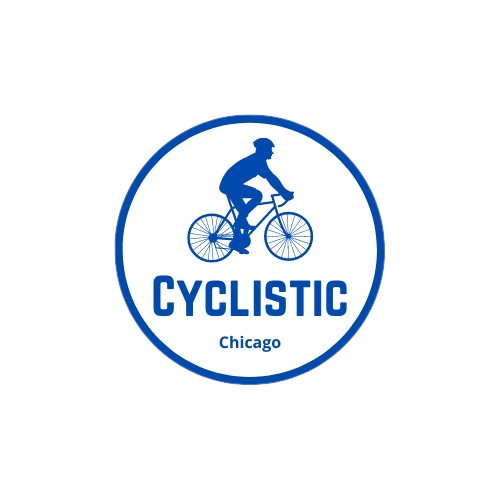

## Como um compartilhamento de bicicletas possibilita o sucesso rápido?

# - Cenário

## Cyclistic, empresa de compartilhamento de bicicletas em Chicago, precisa entender como convencer os ciclistas casuais de adquirir um pacote anual de serviço. Disso depende o futuro crescimento da empresa já que os pacotes anuais são muito mais lucrativos que os passes diários ou por hora.

## As partes interessadas são:
* Lily Moreno: Diretora de marketing.
* Equipe de análise de marketing da Cyclistic.
* Equipe executiva da Cyclistic.

# - Perguntar

## O principal problema a resolver é: 
* Porque os ciclistas casuais de este último ano pagariam por uma membresia anual?
* Qual é a diferença entre o uso das bicicletas por parte dos usuários casuais e os anuais? 
* Que métricas posso usar para convencer um ciclista a comprar uma membresia anual? 
* Que vantagem ele levaria com isso?

# - Preparar

### Origem dos dados <https://divvy-tripdata.s3.amazonaws.com/index.html>
### Os dados foram disponibilizados pela Motivate International Inc. sob licença. Esses são dados públicos que podem ser usados para explorar como os diferentes tipos de clientes estão utilizando as bicicletas da Cyclistic. Cyclistic é uma empresa fictícia.
### Os dados estão organizados por mês

## 1. Importando os pacotes a serem utilizados para:
* Carregar arquivos
* Unir arquivos
* Manipular datas
* Trabalhar com sistema operacional
* Limpeza e tratamento de dados

In [7]:
import pandas as pd # limpeza e tratamento de dados, análise exploratória de dados
import numpy as np
import os # Para trabalhar com sistema operacional, acesar diretorios e pastas
import datetime as dt # Para trabalhar conm datas
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 2. Carregando diversos arquivos simultaneamente e fazendo uma lista dos arquivos
Em meu caso guardei os arquivos em uma pasta chamada estudo_de_caso em C: "C:\estudo_de_caso..."

In [ ]:
lista_dataframes = []
lista_nome = []
diretorio = "/kaggle/input/cyclistic"

for arq in os.listdir(diretorio):
    if arq.endswith(".csv"):
        nome_arquivo = "/" + arq
        nome_df = pd.read_csv(diretorio+nome_arquivo, sep=',', encoding='latin-1')
        print("Nome de arquivo: ", arq)
        lista_dataframes.append(nome_df)

Nome de arquivo:  202306-divvy-tripdata.csv
Nome de arquivo:  202212-divvy-tripdata.csv
Nome de arquivo:  202208-divvy-tripdata.csv


## 3. Quantidade de items na lista

In [ ]:
len(lista_dataframes)

## 4. Vista do primeiro arquivo

In [ ]:
lista_dataframes[0].head()

(Nota) A ideia era concatenar os arquivos em um unico data frame, mas não se vai a unir tudo antes de trabalhar por que o computador não suporta a união,o dataframe fica com mais de 1 gb e é muito dificil para trabalhar. O melhor é trabalhar um por um e quando tenha menos dados unir.

## 5. Comparar os cabeçalhos das colunas para saber se são tudos iguais. Tudo tem que ser True


In [ ]:
lista_one = []
lista_two = []
contador = 1

for h in lista_dataframes[0].columns:
    lista_one.append(h)

while contador < len(lista_dataframes):
    for i in lista_dataframes[contador].columns:
        lista_two.append(i)
    if lista_one == lista_two:
        print("True")
    else:
        print("False")
    lista_two = []
    contador += 1

## 6. Como não vou usar os dados das estações para tirar nenhuma conclusão e também que esses dados incorrem em problemas de privacidade, vou excluí-los.

### As colunas a serem excluidas são:

* start_station_name
* start_station_id
* end_station_name
* end_station_id
* start_lat
* start_lng
* end_lat
* end_lng 

In [ ]:
for j in range(0, len(lista_dataframes)):
    lista_dataframes[j].drop('start_station_name', axis = 1, inplace=True)
    lista_dataframes[j].drop('start_station_id', axis = 1, inplace=True)
    lista_dataframes[j].drop('end_station_name', axis = 1, inplace=True)
    lista_dataframes[j].drop('end_station_id', axis = 1, inplace=True)
    lista_dataframes[j].drop('start_lat', axis = 1, inplace=True)
    lista_dataframes[j].drop('start_lng', axis = 1, inplace=True)
    lista_dataframes[j].drop('end_lat', axis = 1, inplace=True)
    lista_dataframes[j].drop('end_lng', axis = 1, inplace=True)

## 7. Comprovar como ficou o ultimo arquivo

In [ ]:
lista_dataframes[11].head()

## 8. Comprovar de novo que as colunas sejan iguais e da mesma quantidade em tudos os DataFrames.

In [ ]:
lista_one = []
lista_two = []
contador = 1

for h in lista_dataframes[0].columns:
    lista_one.append(h)

while contador < len(lista_dataframes):
    for i in lista_dataframes[contador].columns:
        lista_two.append(i)
    if lista_one == lista_two:
        print("True")
    else:
        print("False")
    lista_two = []
    contador += 1

## 9. Agora com muitos menos dados vou tentar a união.

In [ ]:
contador = 1
df = lista_dataframes[0]

for i in lista_dataframes[1:]:
    df = pd.concat([df, lista_dataframes[contador]])
    contador += 1

## 10. Comprovar como ficou o arquivo concatenado

In [ ]:
df

# - Processar

## 11. Revisar duplicados e apagar.
As linhas eram 5779444 e agora são 5779217. Se apagarem 227 dados

In [ ]:
df = df.drop_duplicates()

## 12. Ver dataframe

In [ ]:
df.head(10)

## 13. Limpar dados faltantes.

In [ ]:
df = df.dropna(axis=0)

## 14. Os dados nao tinham Nulls ou vazios.

In [ ]:
df

## 15. Obter os tipos de dados de cada coluna.

In [ ]:
print("Tipos de dados das colunas em DataFrame")
df.dtypes

## 16. Convertir "started_at" e "ended_at" de object em datetime64 e comprovar dataframe.

In [ ]:
df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])
df.head()

## 17. Comprovar os tipos de dados de cada coluna.

In [ ]:
df.dtypes

## 18. Fazer uma nova columna com o comprimento do passeio de nome time_min, sustraindo o final del percurso menos o inicio dele (ended_at - started_at) e comprovar o dataframe.
Esta coluna nos mostrará a duração da viagem em minutos para cada um

In [ ]:
df["time_min"] = (df["ended_at"] - df["started_at"]) / dt.timedelta(minutes=1)
df["time_min"] = df["time_min"].astype('int32')
df.head()

## 19. Apagar tempos menores que 1 min por considerar eles enviesados.

(Nota) Quem pode fazer um percurso de uma estação a outra em menos de um minuto?

O arquivo passou de ter 5779217 linhas a 5628437 . Ou seja 150780 linhas apagadas

In [ ]:
df.drop(df[(df['time_min'] <= 1)].index, inplace=True)

## 20. Comprovar dataframe

In [ ]:
df

## 21. Comprovando os tipos de dados de cada coluna.

In [ ]:
df.dtypes

## 22. Colocar 3 colunas novas
* month (mes)
* year (ano)
* weekday (dia da semana)

In [ ]:
def my_func(x):
    return x.strftime('%A')

df["weekday"] = df["started_at"].apply(my_func)

df['month'] = df[ "started_at"].dt.month
df['year'] = df[ "started_at"].dt.year

## 23. Comprovar dataframe.

In [ ]:
df.head()

## 24. Agregando a coluna "hour", para saber a hora de inicialização do percurso.

In [ ]:
df['hour'] = df['started_at'].dt.hour
df = df.astype({'hour':'int8'})

## 25. Comprovar dataframe.

In [ ]:
df.head()

## 26. Traducir ao portugues os dias da semana.

In [ ]:
dias_da_semana = {"Monday":"Segunda-feira", "Tuesday":"Terça-feira", "Wednesday":"Quarta-feira", "Thursday":"Quinta-feira", "Friday":"Sexta-Feira", "Saturday":"Sabado", "Sunday":"Domingo"}
df["week_day"] = df["weekday"].replace(dias_da_semana)

## 27. Comprovar dataframe.

In [ ]:
df.head()

## Os dados estao prontos para analisis.

# - Analisar

## 28. Contar a frecuencia de membros anuais e casuais.

In [ ]:
df["member_casual"].value_counts()

## 29. Porcentagem de cada um.

In [ ]:
mtp = df["member_casual"].value_counts(normalize=True)
mtp_arr = round(mtp, 4) * 100
mtp_arr

## 30. Promedio de duração dos viagens.

In [ ]:
meia = df["time_min"].mean()
meia_arr = round(meia, 2)
meia_arr

## 31. Valor minimo.

In [ ]:
df["time_min"].min()

## 32. Valor maximo.

In [ ]:
df["time_min"].max()

## 33. Meia da duração dos viagens por tipo de cliente:

In [ ]:
meia_semana_tc = df.groupby("member_casual")["time_min"].mean()
av_sem_tc = round(meia_semana_tc, 2)
av_sem_tc

## 34. Meia da duração dos viagens por dia da semana:

As duas primeiras linhas deste codigo são muito importantes, 
ja que definem como serão ordenados os dias da semana

In [ ]:
dias_ordenados = ["Segunda-feira", "Terça-feira", "Quarta-feira", "Quinta-feira", "Sexta-Feira", "Sabado", "Domingo"]
df["week_day"] = pd.Categorical(df["week_day"], dias_ordenados)
meia_semana = df.groupby("week_day")["time_min"].mean()
meia_sem_arr = round(meia_semana, 2)
meia_sem_arr

## 35. Quantidade dos viagens por dia da semana:

In [ ]:
q_semana = df.groupby("week_day")["time_min"].count()
q_semana

## 36. Meia da duração dos viagens por dia da semana e por tipo de cliente:

In [ ]:
meia_semana_mc = df.groupby(["week_day", "member_casual"])["time_min"].mean()
m_s_mc = round(meia_semana_mc, 2)
m_s_mc 

## 37. quantidade dos viagens por dia da semana e por tipo de cliente:

In [ ]:
q_sem_mc = df.groupby(["week_day", "member_casual"])["time_min"].count()
q_sem_mc 

## 38. Comprimento médio das viagens por dia da semana para tipo de cliente por tipo de bicicleta

In [ ]:
mean_sem_especial = df.groupby(["week_day", "member_casual", "rideable_type"])["time_min"].mean()
mean_esp = round(mean_sem_especial, 2)
mean_esp

## 39. Quantidade de viagens por dia da semana para tipo de cliente e por tipo de bicicleta.

In [ ]:
q_sem_especial = df.groupby(["week_day", "member_casual", "rideable_type"])["time_min"].count()
q_sem_especial

## 40. Tipo de clientes / Tipo de bicicletas.

In [ ]:
tb_tc = df.groupby(["member_casual", "rideable_type"])["rideable_type"].count()
tb_tc

## 41. Tipo de bicicletas / Tipo de clientes

In [ ]:
tc_tb = df.groupby(["rideable_type", "member_casual"])["rideable_type"].count()
tc_tb

## 42. Tipo de clientes / Tipo de bicicletas = Tempo meio de uso.

In [ ]:
tb_tc_meantime = df.groupby(["member_casual", "rideable_type"])["time_min"].mean()
tb_tc_mt = round(tb_tc_meantime, 2) 
tb_tc_mt

## 43. O mês mais popular para aluguel de bicicletas.

In [ ]:
# Mudar numero do mês por nome
df['month'] = df['started_at'].dt.month_name()

In [ ]:
# Mudar nome em ingles por nome em português
nomes_do_mes = {"January":"Janeiro", "February":"Fevereiro", "March":"Março", 
                "April":"Abril", "May":"Maio", "June":"Junho", "July":"Julho", 
                "August":"Agosto", "September":"Setembro", "October":"Outubro", 
                "November":"Novembro", "December":"Dezembro"}
df["month"] = df["month"].replace(nomes_do_mes)

In [ ]:
# Ordenar nomes dos meses
meses_ordenados = ["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", "Julho", 
                 "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"]
df["month"] = pd.Categorical(df["month"], meses_ordenados)

In [ ]:
pm_pivot = pd.pivot_table(df, index=['month', 'member_casual'], values='ride_id', aggfunc=['count'],
                         margins=True, margins_name='total count')
pm_pivot

## 44. Duração meia do percurso por mês.

In [ ]:
rlm_pivot = pd.pivot_table(df, index=['month', 'member_casual'], values='time_min', aggfunc=['mean'],
                         margins=True, margins_name='total time_min mean')
rlm_pivot_arr = round(rlm_pivot, 2)
rlm_pivot_arr

## 45. Número total de viagens por hora.

In [ ]:
tnr_pivot = pd.pivot_table(df, index=['hour', 'member_casual'], values='ride_id', aggfunc=['count'],
                         margins=True, margins_name='total ride_id count')
tnr_pivot

## 46. Conclussõês

##  Uso das bikes por tipo de cliente:

#### Os membros anuais demandam mais vezes as bikes.

* 60 % Membros anuais
* 40 % Casuais

#### Mais tempo de uso por parte dos casuais

* Casuais   28,32 minutos em meia
* Membros   12,49 minutos em meia

#### Os clientes casuais e os membros usam mais tempo as bicicletas os fins de semana
#### Os clientes membros demandam mais as bicicletas os dias uteis os casuais mais os fins de semana
#### Os clientes casuais quando alugam uma bicicleta acoplada a usam por mais tempo
#### As bicicletas eletricas são as preferidas dos dois tipos de clientes
#### Os membros anuais não alugam docked_bike (Bicicleta acoplada)
#### Os membros anuais aluga em quase a mesma proporção biciletas comuns e bicicletas eletricas

# - Compartilhar

## Visualizações

## 47. Visualizando passeios por tipo de usuário

Este gráfico de pizza amostra que os membros anuais representam a maioria dos usuários do sistema de compartilhamento de bicicletas da Cyclistic, perfazendo 60,17% do total de usuários.

In [ ]:
plt.pie(df["member_casual"].value_counts(normalize=True),
        labels=["Membros", "Casuais"],
        autopct='%1.2f%%',
        startangle=60,
        radius=1,
        shadow=True, 
        colors=['#008080', '#ffd700'],
        explode=(0, 0.1))

plt.title('Passeios por tipo de usuario', fontsize = 15)
plt.axis('equal')
plt.show()

## 48. Visualizando o comprimento médio do percurso.

In [ ]:
df1 = df[['time_min', 'member_casual']]
df2 = df1.groupby(['member_casual'], as_index=False)[['time_min']].mean()

plt.figure(figsize = (3,4))
sns.set_theme(style='white')
sns.barplot(data=df2,
            x='member_casual',
            y='time_min',
            palette=['#008080', '#ffd700'])

plt.title('Duração média do percurso', fontsize = 15)
plt.xlabel('Tipo de usuário', fontsize = 11)
plt.ylabel('Duração média da viagem (minutos)', fontsize = 11)
plt.show()

O gráfico de colunas acima nos mostra que os passageiros casuais têm uma média de comprimento de viagem muito maior do que os membros. A duração média do passeio é de 29,05 minutos para passageiros casuais e 12,60 minutos para membros.

## 49. Visualizando o tipo de passeio mais popular.

In [ ]:
df2 = df[['rideable_type', 'member_casual', 'ride_id']]
df2 = df2.groupby(['rideable_type', 'member_casual'], as_index=False)[['ride_id']].count()

plt.figure(figsize = (8,3))
sns.set_theme(style='white')
plt.ticklabel_format(style='plain', axis='x')
sns.barplot(x='ride_id', 
            y='rideable_type', 
            hue='member_casual', 
            palette=['#008080', '#ffd700'], 
            data=df2)

plt.title('O tipo de passeio mais popular', fontsize = 18)
plt.xlabel('Número total de passeios', fontsize =  12)
plt.ylabel('Tipo de bicicleta', fontsize = 12)
plt.show()

Existem três tipos de bicicletas, comum, elétrica e tipo triciclo (acoplada). As mais alugadas por membros anuais e casuais são as bicicletas elétricas. As bicicletas do tipo triciclo são alugadas apenas por pessoas casuais e em pouquíssima quantidade.

## 50. Visualizando o dia mais popular da semana para aluguel de bicicletas.

In [ ]:
df3 = df[['week_day', 'member_casual', 'ride_id']]
df3 = df3.groupby(['week_day', 'member_casual'], as_index=False)[['ride_id']].count()

plt.figure(figsize = (12,6))
sns.set_theme(style='white')
sns.barplot(data = df3, 
            x = "week_day", 
            y = "ride_id", 
            hue = "member_casual", 
            palette = ['#008080', '#ffd700'])

plt.title('El dia mais popular da semana para aluguel de bicicletas', fontsize = 18)
plt.xlabel('Dias da semana', fontsize = 12)
plt.ylabel('Número total de passeios', fontsize = 12)


Os membros anuais alugam mais durante todos os dias úteis da semana, enquanto os membros casuais alugam mais nos fins de semana.

## 51. Visualizando o mês mais popular do ano para aluguel de bicicletas

In [ ]:
df4 = df[['month', 'member_casual', 'ride_id']]
df4 = df4.groupby(['month', 'member_casual'], as_index=False)[['ride_id']].count()

plt.figure(figsize = (14,6))
sns.set_theme(style='white')
sns.barplot(data=df4,  
            x='month', 
            y='ride_id', 
            hue='member_casual', 
            palette=['#008080', '#ffd700'],)

plt.title('O mês mais popular do ano para aluguel de bicicletas', fontsize = 20)
plt.xlabel('Meses', fontsize = 15)
plt.ylabel('Numero total de alugueis', fontsize = 15)
plt.show()

Os meses com mais alugueis são os meses de verão, com o número de passeios a cair bastante no inverno. Nesse caso, o comportamento é semelhante nos dois tipos de clientes.

## 52. Visualizando a duração média do percurso por dia da semana.

In [ ]:
df5 = df[['week_day', 'member_casual', 'time_min']]
df5 = df5.groupby(['week_day', 'member_casual'], as_index=False)[['time_min']].mean()

sns.set_theme(style='whitegrid')
plt.figure(figsize = (14,6))
sns.lineplot(data=df5, 
             x='week_day', 
             y='time_min', 
             hue='member_casual', 
             style='member_casual', 
             palette='colorblind', 
             markers=True)

plt.title('Duração média do passeio por dia da semana', fontsize = 20)
plt.xlabel('Dias da semana', fontsize = 15)
plt.ylabel('Duração do percurso (minutos)', fontsize = 15)
plt.show()


A duração média dos passeios é maior aos finais de semana para os dois tipos de clientes, mas a diferença é bem maior para os clientes casuais. Enquanto para os clientes casuais a média de viagem nos dias de semana cai muito, para os clientes casuais a média de segunda a sexta é igual.

## 53. Visualizando a duração média do percurso por mês.

In [ ]:

df6 = df[['month', 'member_casual', 'time_min']]
df6 = df6.groupby(['month', 'member_casual'], as_index=False)[['time_min']].mean()

sns.set_theme(style='whitegrid')
plt.figure(figsize = (14,6))
sns.lineplot(data=df6, 
             x='month', 
             y='time_min', 
             hue='member_casual', 
             palette='colorblind', 
             style='member_casual', 
             markers=True)

plt.title('Duração média do percurso por mês', fontsize = 20)
plt.xlabel('Meses', fontsize = 15)
plt.ylabel('Duração do percurso (minutos)', fontsize = 15)
plt.show()

A mesma condição se repete quanto à quantidade em relação aos meses do ano, não só que mais bicicletas sejam alugadas durante os meses de verão e primavera, mas também que os passeios durem mais. Mesma condição para ambos os tipos de clientes.

## 54. Visualizando o número total de viagens por hora.

In [ ]:
df7 = df[['hour', 'member_casual', 'ride_id']]
df7 = df7.groupby(['hour', 'member_casual'], as_index=False)[['ride_id']].count()

sns.set_theme(style='whitegrid')
plt.figure(figsize = (14,6))
sns.lineplot(data=df7, 
             x='hour', 
             y='ride_id', 
             hue='member_casual', 
             palette='colorblind',
             style='member_casual', 
             markers=True)

plt.title('Número total de viagens por hora', fontsize = 20)
plt.xlabel('Horas', fontsize = 15)
plt.ylabel('Número de passeios', fontsize = 15)
plt.show()

O comportamento dos dois tipos de clientes é semelhante em diferentes momentos do dia. O horário de maior movimento é às 17 hs, onde os dois clientes apresentam um aumento significativo no número de alugueres. Às 8 hs, os clientes membros têm um aumento no número de passeios, que provavelmente as bicicletas serão usadas para chegar ao trabalho.

# - Agir

## 55. Conclusão final.

### Com base nas análises e visualizações realizadas, pode-se inferir que os clientes casuais passam mais tempo em bicicletas, e que o interesse pelas bicicletas elétricas é igual ao dos clientes associados. Também que os meses mais quentes, verão e primavera, são os meses com maiores rendas e que os horários de entrada e saída dos empregos também são os mais exigidos.

## 56. Recomendaçõe finais.

### 1. Poderia fazer-se uma promoção, reforçando a utilização das bicicletas elétricas e o seu impacto benéfico no meio ambiente e como nos fazem chegar ao trabalho mais descansados.

### 2. A mesma promoção deve ser incrementada na primavera onde aumenta o interesse dos usuários pelas bicicletas.